In [13]:
import pandas as pd

In [14]:
df = pd.read_csv("complaints.csv")

In [15]:
df.head(5)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/30/25,Mortgage,Conventional home mortgage,Trouble during payment process,"Escrow, taxes, or insurance","In XXXX, I received a check for {$8000.00} fro...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",MD,21215,NaN,Consent provided,Web,05/30/25,Closed with explanation,Yes,NaN,13816713
1,02/16/24,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,REGIONS FINANCIAL CORPORATION,SC,29576,NaN,NaN,Phone,02/17/24,Closed with explanation,Yes,NaN,8359915
2,07/16/23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MD,20707,NaN,Consent not provided,Web,07/16/23,Closed with explanation,Yes,NaN,7257967
3,09/01/25,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,33018,NaN,NaN,Web,09/01/25,In progress,Yes,NaN,15638789
4,08/20/24,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Unable to receive car title or other problem a...,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11530,NaN,Consent not provided,Web,08/20/24,Closed with explanation,Yes,NaN,9866644


In [16]:
df.describe()

,Consumer disputed?,Complaint ID
count,0.0,1.124592e+06
mean,NaN,1.050061e+07
std,NaN,2.864340e+06
min,NaN,6.039555e+06
25%,NaN,7.961994e+06
50%,NaN,1.036558e+07
75%,NaN,1.264504e+07
max,NaN,1.633560e+07


In [33]:
df['Product'].unique()

array(['Mortgage', 'Checking or savings account',
       'Credit reporting, credit repair services, or other personal consumer reports',
       'Vehicle loan or lease', 'Debt collection', 'Credit card',
       'Money transfer, virtual currency, or money service',
       'Credit card or prepaid card', 'Student loan',
       'Payday loan, title loan, personal loan, or advance loan',
       'Debt or credit management',
       'Payday loan, title loan, or personal loan'], dtype=object)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1124592 entries, 0 to 1124591
Data columns (total 18 columns):
 #   Column                        Non-Null Count    Dtype  
---  ------                        --------------    -----  
 0   Date received                 1124592 non-null  object 
 1   Product                       1124592 non-null  object 
 2   Sub-product                   1124587 non-null  object 
 3   Issue                         1124587 non-null  object 
 4   Sub-issue                     964236 non-null   object 
 5   Consumer complaint narrative  554652 non-null   object 
 6   Company public response       415163 non-null   object 
 7   Company                       1124592 non-null  object 
 8   State                         1118361 non-null  object 
 9   ZIP code                      1124523 non-null  object 
 10  Tags                          144755 non-null   object 
 11  Consumer consent provided?    953595 non-null   object 
 12  Submitted via               

In [18]:
df.shape

(1124592, 18)

In [19]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                           5
Issue                                 5
Sub-issue                        160356
Consumer complaint narrative     569940
Company public response          709429
Company                               0
State                              6231
ZIP code                             69
Tags                             979837
Consumer consent provided?       170997
Submitted via                         0
Date sent to company                  0
Company response to consumer          3
Timely response?                      0
Consumer disputed?              1124592
Complaint ID                          0
dtype: int64

In [20]:
# Drop rows with null values in specific columns
columns_to_check = ['Sub-product', 'Issue', 'State','ZIP code','Company response to consumer']  # replace with your column names
df = df.dropna(subset=columns_to_check)

In [21]:
df.isnull().sum()

Date received                         0
Product                               0
Sub-product                           0
Issue                                 0
Sub-issue                        157382
Consumer complaint narrative     566999
Company public response          705030
Company                               0
State                                 0
ZIP code                              0
Tags                             974256
Consumer consent provided?       170236
Submitted via                         0
Date sent to company                  0
Company response to consumer          0
Timely response?                      0
Consumer disputed?              1118326
Complaint ID                          0
dtype: int64

In [22]:
df.describe(include='object')

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?
count,1118326,1118326,1118326,1118326,960944,551327,413296,1118326,1118326,1118326,144070,948090,1118326,1118326,1118326,1118326
unique,1097,12,58,92,212,473446,10,4754,61,22730,3,4,5,1098,5,2
top,01/17/25,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,I am filing a complaint against Cash App ( Blo...,Company has responded to the consumer and the ...,"TRANSUNION INTERMEDIATE HOLDINGS, INC.",TX,XXXXX,Servicemember,Consent provided,Web,01/17/25,Closed with explanation,Yes
freq,20339,438041,196649,199500,112324,7731,327438,59733,146278,27905,78669,551486,1048064,15130,840071,1095020


In [23]:
for col in df.select_dtypes(include='object').columns:
    print(df[col].value_counts())
    print()

Date received
01/17/25    20339
01/18/25    12372
01/16/25     8553
01/15/25     7685
01/20/25     6457
            ...  
11/06/22      216
09/28/25      206
01/14/24      187
12/25/23      169
12/25/22      145
Name: count, Length: 1097, dtype: int64

Product
Debt collection                                                                 438041
Checking or savings account                                                     173192
Credit card                                                                     164338
Money transfer, virtual currency, or money service                              105206
Mortgage                                                                         66137
Credit card or prepaid card                                                      45719
Student loan                                                                     44425
Vehicle loan or lease                                                            42925
Payday loan, title loan, personal loan, or 

In [25]:
import pandas as pd

# Load the data
df = pd.read_csv("complaints.csv")

# Fill empty values in hierarchy columns with a placeholder
df['Product'] = df['Product'].fillna('No Product')
df['Sub-product'] = df['Sub-product'].fillna('No Sub-product')
df['Issue'] = df['Issue'].fillna('No Issue')
df['Sub-issue'] = df['Sub-issue'].fillna('No Sub-issue')

import plotly.express as px

# Create sunburst plot
fig = px.sunburst(
    df,
    path=['Product', 'Sub-product', 'Issue', 'Sub-issue'],
    title='Hierarchy of Product, Sub-product, Issue, and Sub-issue',
    maxdepth=-1  # Show all levels
)
fig.show()

C:\Users\kunda\AppData\Local\Temp\ipykernel_30444\3657296482.py:10: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



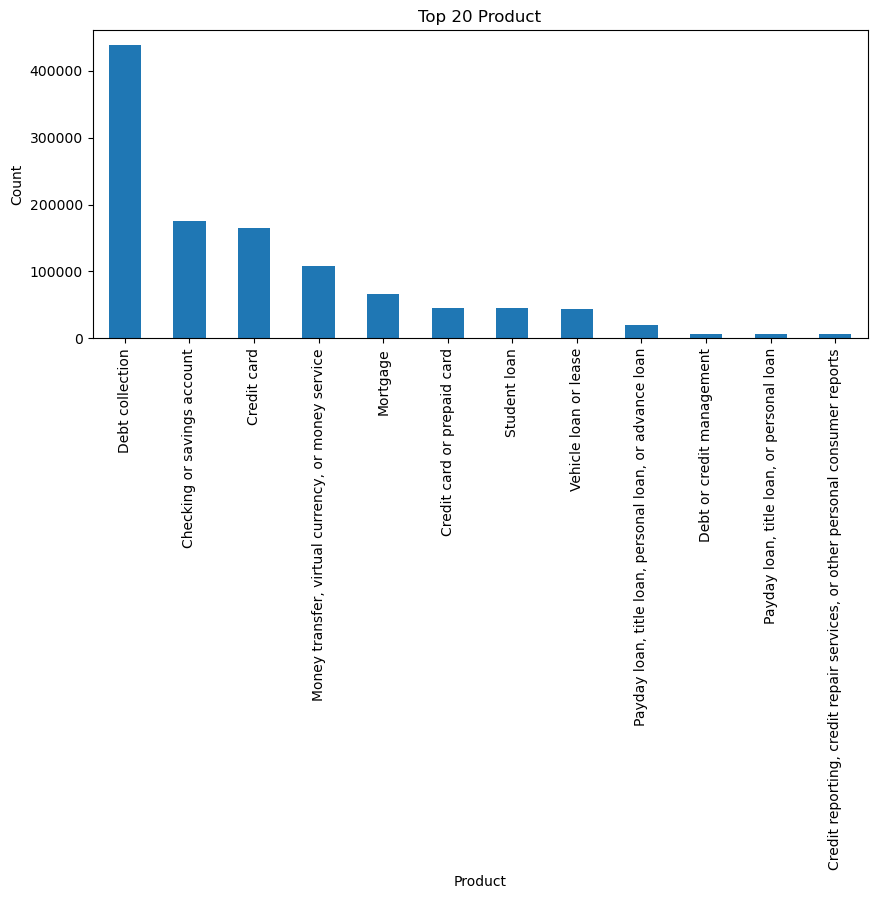

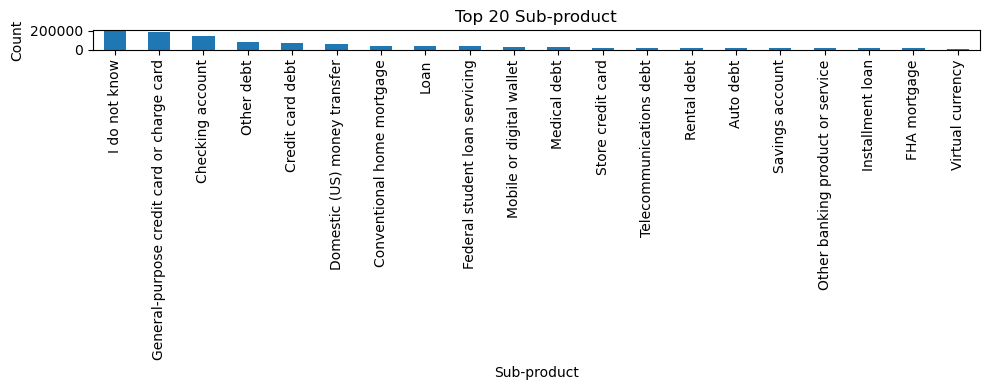

C:\Users\kunda\AppData\Local\Temp\ipykernel_30444\3657296482.py:10: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



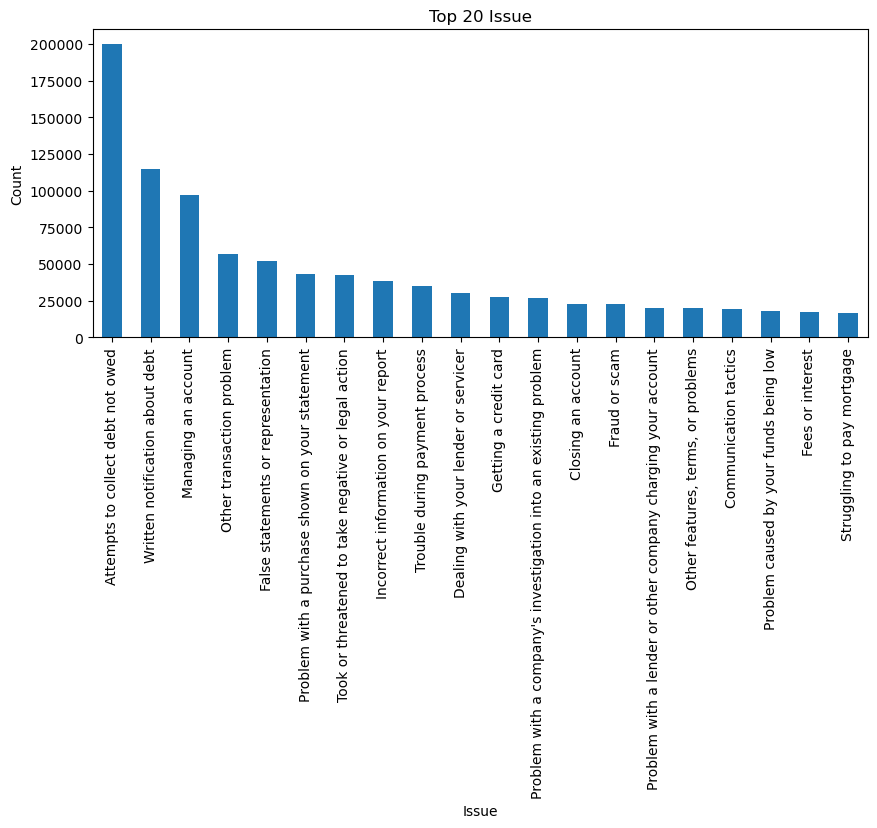

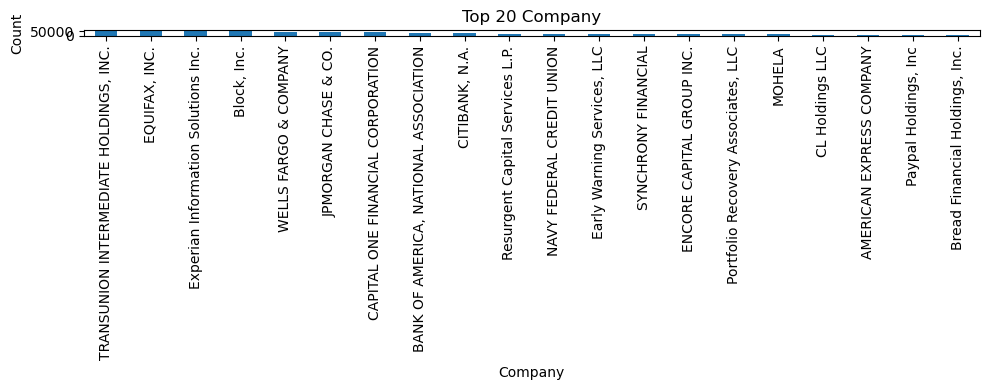

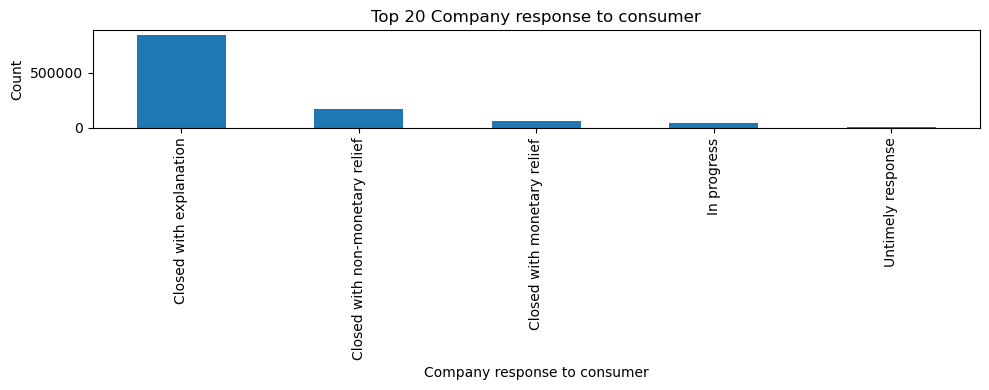

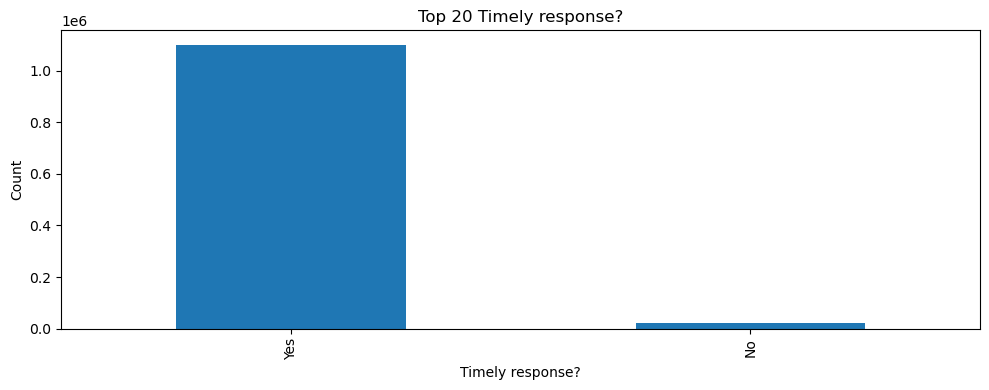

In [ ]:
import matplotlib.pyplot as plt

categorical_cols = ['Product', 'Sub-product', 'Issue', 'Company', 'Company response to consumer', 'Timely response?']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    df[col].value_counts().head(20).plot(kind='bar')
    plt.title(f'Top 20 {col}')
    plt.ylabel('Count')
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

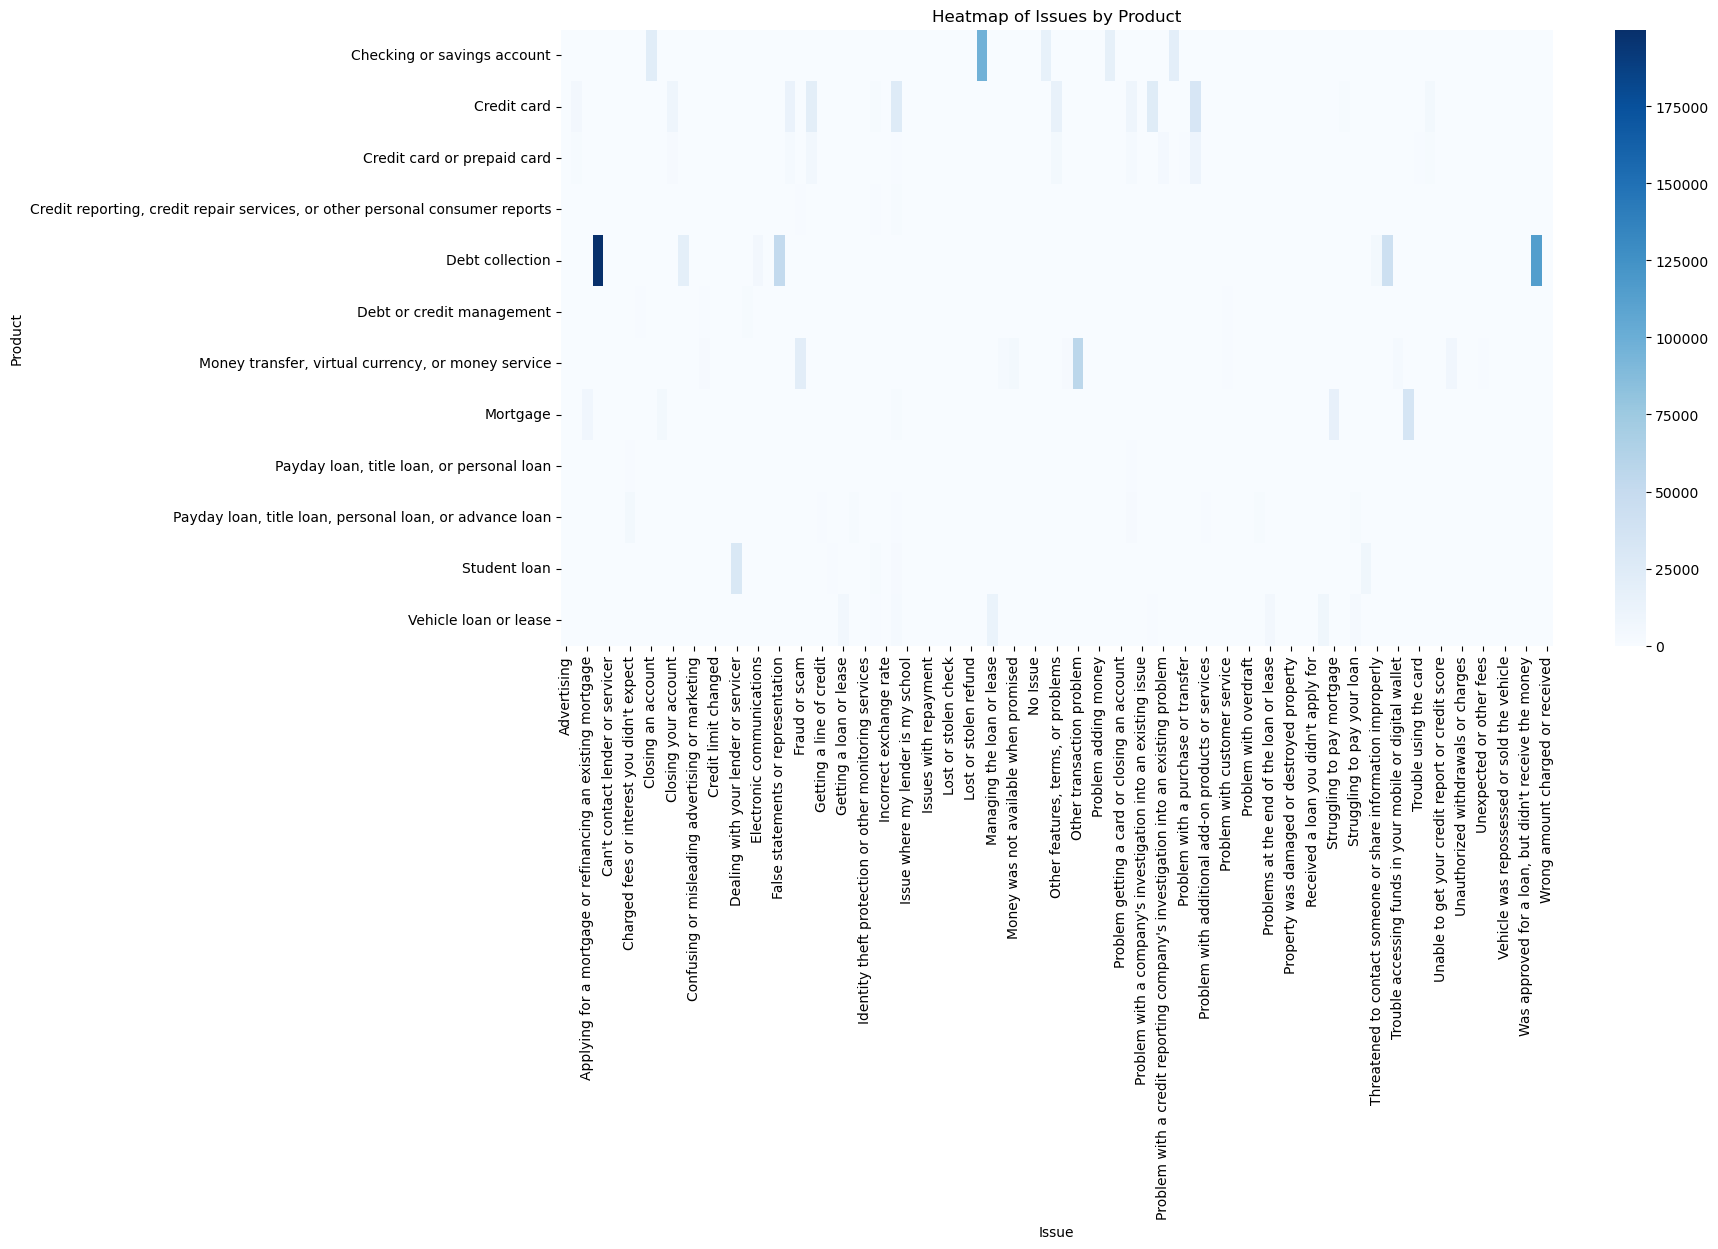

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
pivot = df.pivot_table(index='Product', columns='Issue', values='Complaint ID', aggfunc='count', fill_value=0)
plt.figure(figsize=(16,8))
sns.heatmap(pivot, cmap='Blues')
plt.title('Heatmap of Issues by Product')
plt.xlabel('Issue')
plt.ylabel('Product')
plt.show()

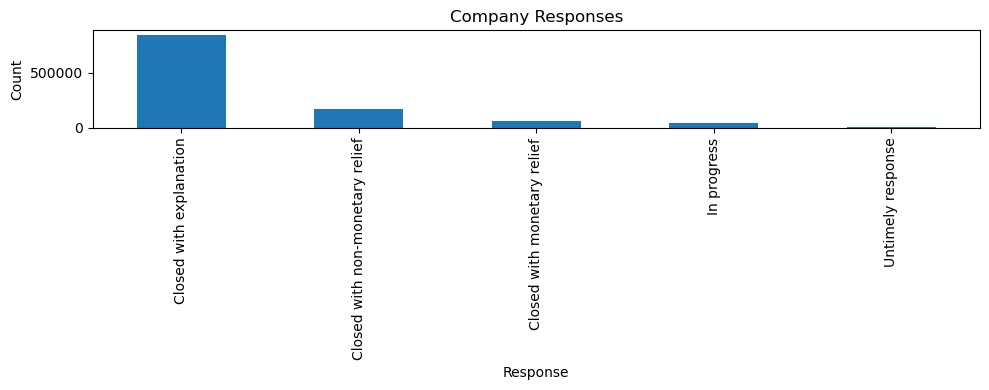

In [ ]:
plt.figure(figsize=(10,4))
df['Company response to consumer'].value_counts().plot(kind='bar')
plt.title('Company Responses')
plt.ylabel('Count')
plt.xlabel('Response')
plt.tight_layout()
plt.show()

C:\Users\kunda\AppData\Local\Temp\ipykernel_30444\3533521201.py:1: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



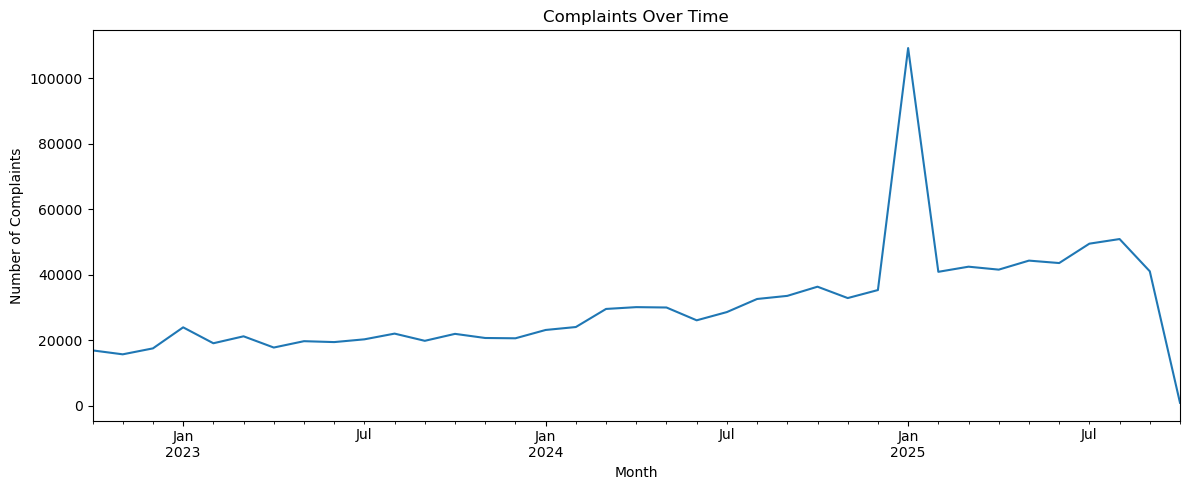

In [ ]:
df['Date received'] = pd.to_datetime(df['Date received'])
df['Month'] = df['Date received'].dt.to_period('M')
monthly_counts = df.groupby('Month').size()

plt.figure(figsize=(12,5))
monthly_counts.plot()
plt.title('Complaints Over Time')
plt.ylabel('Number of Complaints')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

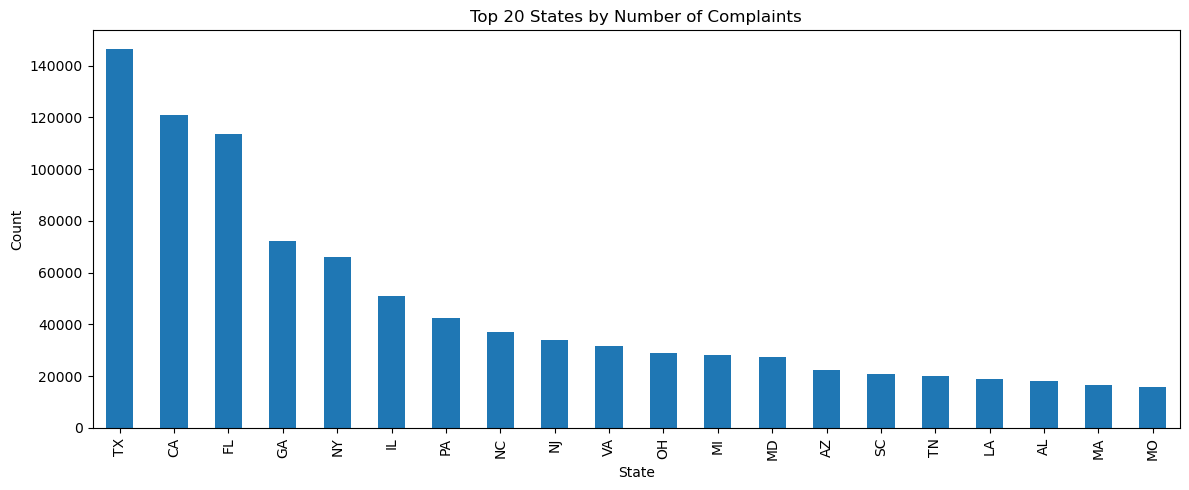

In [ ]:
plt.figure(figsize=(12,5))
df['State'].value_counts().head(20).plot(kind='bar')
plt.title('Top 20 States by Number of Complaints')
plt.ylabel('Count')
plt.xlabel('State')
plt.tight_layout()
plt.show()

In [35]:
df.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Complaint ID'],
      dtype='object')

In [37]:
from transformers import pipeline
classifier = pipeline("zero-shot-classification", model="facebook/bart-large-mnli")

categories = [
    "Mortgage",
    "Checking or Savings Account",
    "Credit Reporting or Repair Services",
    "Vehicle Loan or Lease",
    "Debt Collection",
    "Credit Card",
    "Money Transfer or Virtual Currency",
    "Prepaid or Credit Card",
    "Student Loan",
    "Personal or Payday Loan",
    "Debt or Credit Management"
]

result = classifier(df["Consumer complaint narrative"][0], candidate_labels=categories)
print(result)


Device set to use cpu


{'sequence': 'In XXXX, I received a check for {$8000.00} from Bank of America. The enclosed letter stated that I had an escrow surplus, that I was more than covered for next year \'s taxes, and that I now was issued an overage check. I ensured the letter, the check, and my property tax ( XXXXXXXX XXXX XXXXXXXX ) information were accurate. When I purchased my home, in XXXX, my title company had me pay taxes relative to the sales price of my home. My home was a refurbished/new build, and I was told to pay that amount to ensure my escrow account would have sufficient funds to pay taxes post property value assessment. In XXXXXXXX XXXX XXXXXXXX, I received a tax bill from the XXXXXXXX XXXX XXXXXXXX, stating that I owed over {$5000.00} in property taxes. Bank of America pays my taxes from my escrow, and I had received the escrow so I did not think that anything was wrong. Early in XXXX, I received a notice of property tax nonpayment, and I was informed that my home would be auctioned ; I imm

In [40]:
i = 5 
text = df["Consumer complaint narrative"].iloc[i]
result = classifier(text, candidate_labels=categories)
print(f"Complaint #{i}:")
print(text)
print("\nPredicted Category:", result['labels'][0])
print("Confidence:", round(result['scores'][0], 3))



Complaint #5:
Debt Collector failed to identify themselves as a Debt Colletor - represented themselves as an attorney. Threatened law suits and seizure of banks/property. 

Quote : " As of now we have done nothing that would negatively reflect on your company as well as any recommendation 's for suit or liens. '' " This ALSO could include bank accounts, real estate, vehicles, or other valuable possessions. '' " If i do not hear from you i will make a recomindation to start the assit & liablity investigation ''

Predicted Category: Debt Collection
Confidence: 0.709


In [41]:
df.head(6)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,05/30/25,Mortgage,Conventional home mortgage,Trouble during payment process,"Escrow, taxes, or insurance","In XXXX, I received a check for {$8000.00} fro...",Company has responded to the consumer and the ...,"BANK OF AMERICA, NATIONAL ASSOCIATION",MD,21215,NaN,Consent provided,Web,05/30/25,Closed with explanation,Yes,NaN,13816713
1,02/16/24,Checking or savings account,Checking account,Problem with a lender or other company chargin...,Transaction was not authorized,NaN,Company has responded to the consumer and the ...,REGIONS FINANCIAL CORPORATION,SC,29576,NaN,NaN,Phone,02/17/24,Closed with explanation,Yes,NaN,8359915
2,07/16/23,"Credit reporting, credit repair services, or o...",Other personal consumer report,Incorrect information on your report,Personal information incorrect,NaN,Company has responded to the consumer and the ...,Experian Information Solutions Inc.,MD,20707,NaN,Consent not provided,Web,07/16/23,Closed with explanation,Yes,NaN,7257967
3,09/01/25,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,NaN,NaN,CAPITAL ONE FINANCIAL CORPORATION,FL,33018,NaN,NaN,Web,09/01/25,In progress,Yes,NaN,15638789
4,08/20/24,Vehicle loan or lease,Loan,Problems at the end of the loan or lease,Unable to receive car title or other problem a...,NaN,Company has responded to the consumer and the ...,"CITIBANK, N.A.",NY,11530,NaN,Consent not provided,Web,08/20/24,Closed with explanation,Yes,NaN,9866644
5,02/06/24,Debt collection,Other debt,Took or threatened to take negative or legal a...,Seized or attempted to seize your property,Debt Collector failed to identify themselves a...,Company believes it acted appropriately as aut...,"Davis & Jones, LLC",WI,54303,NaN,Consent provided,Web,06/04/24,Closed with explanation,Yes,NaN,8296363


In [ ]:
i = 4  # 5th complaint (index starts at 0)
text = df["Consumer complaint narrative"].iloc[i]

# Skip missing or invalid text just in case
if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
    print(f"Complaint #{i}: Skipped (no valid text)")
else:
    result = classifier(text, candidate_labels=categories)
    print(f"\nComplaint #{i}:")
    print("Predicted Category:", result['labels'][0])
    print("Confidence:", round(result['scores'][0], 3))
    print("Complaint text (truncated):", text[:200], "...")



Complaint #4: Skipped (no valid text)


In [45]:
i = 5 
text = df["Consumer complaint narrative"].iloc[i]

# Skip missing or invalid text just in case
if pd.isna(text) or not isinstance(text, str) or text.strip() == "":
    print(f"Complaint #{i}: Skipped (no valid text)")
else:
    result = classifier(text, candidate_labels=categories)
    print(f"\nComplaint #{i}:")
    print("Predicted Category:", result['labels'][0])
    print("Confidence:", round(result['scores'][0], 3))
    print("Complaint text (truncated):", text[:200], "...")




Complaint #5:
Predicted Category: Debt Collection
Confidence: 0.709
Complaint text (truncated): Debt Collector failed to identify themselves as a Debt Colletor - represented themselves as an attorney. Threatened law suits and seizure of banks/property. 

Quote : " As of now we have done nothing  ...


In [57]:
i = 1124577
text = df["Consumer complaint narrative"].iloc[i]
result = classifier(text, candidate_labels=categories)
print(f"Complaint #{i}:")
print(text)
print("\nPredicted Category:", result['labels'][0])




Complaint #1124577:
Subject : Dispute of Unauthorized Debt on My Credit Report Dear Leafy, I am writing to formally dispute a debt that has been listed on my credit report under your companys name. I recently discovered this debt while reviewing my credit file, and I am requesting that it be investigated and removed immediately as it is not mine. 

I have never received any prior communication from your office regarding this alleged debt. Additionally, I have never signed any contract or entered into any agreement with your company or any organization you may be representing. Therefore, I have no legal obligation to pay this debt. 

Under the Fair Debt Collection Practices Act ( FDCPA ) and the Fair Credit Reporting Act ( FCRA ), I have the right to request validation of this debt, including : XXXX. The name of the original creditor, XXXX. The amount of the alleged debt, XXXX. Proof that I am legally obligated to pay it ( such as a signed agreement ), XXXX. A detailed explanation of ho

In [62]:
i = 16
text = df["Consumer complaint narrative"].iloc[i]
result = classifier(text, candidate_labels=categories)
print(f"Complaint #{i}:")
print(text)
print("\nPredicted Category:", result['labels'][0])




Complaint #16:
I am filing a complaint against Cash App ( Block , Inc. ) due to inadequate customer service and unfair practices, which violate the Consumer Financial Protection Act ( CFPA ). Specifically, Cash App failed to take timely and effective measures to prevent and address fraud on their platform, leaving my account vulnerable and unprotected. Furthermore, their dispute resolution process was unfair and deceptive, as they did not comply with error resolution requirements under the Electronic Fund Transfer Act ( EFTA ) and Regulation E. These actions have caused significant inconvenience and financial loss, and I seek appropriate redress for these violations.

Predicted Category: Prepaid or Credit Card
